In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv("../data/heart.csv")
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [8]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    str    
 3   dataset   920 non-null    str    
 4   cp        920 non-null    str    
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    str    
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    str    
 13  ca        309 non-null    float64
 14  thal      434 non-null    str    
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(2), str(6)
memory usage: 115.1+ KB


In [9]:
df.describe()


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [10]:
df.shape


(920, 16)

In [11]:
df.isnull().sum()


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [12]:
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)
df['num'].value_counts()


num
1    509
0    411
Name: count, dtype: int64

In [13]:
df = df.drop(columns=['ca'])
df.isnull().sum()


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
thal        486
num           0
dtype: int64

In [14]:
df = df.drop(columns=['thal'])
df.isnull().sum()


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
num           0
dtype: int64

In [15]:
mode_value = df['slope'].mode()[0]
print("Mode is:", mode_value)

df['slope'] = df['slope'].fillna(mode_value)

df['slope'].isnull().sum()


Mode is: flat


np.int64(0)

In [16]:
df['slope'].unique()


<StringArray>
['downsloping', 'flat', 'upsloping']
Length: 3, dtype: str

In [17]:
df['slope'] = df['slope'].astype('object')

mode_value = df['slope'].mode()[0]
df['slope'] = df['slope'].fillna(mode_value)

df['slope'].isnull().sum()


np.int64(0)

In [18]:
df.isnull().sum()

id           0
age          0
sex          0
dataset      0
cp           0
trestbps    59
chol        30
fbs         90
restecg      2
thalch      55
exang       55
oldpeak     62
slope        0
num          0
dtype: int64

In [19]:
median_value = df['trestbps'].median()
df['trestbps'] = df['trestbps'].fillna(median_value)

df['trestbps'].isnull().sum()


np.int64(0)

In [20]:
median_value = df['chol'].median()
df['chol'] = df['chol'].fillna(median_value)

df['chol'].isnull().sum()


np.int64(0)

In [21]:
median_value = df['thalch'].median()
df['thalch'] = df['thalch'].fillna(median_value)

df['thalch'].isnull().sum()


np.int64(0)

In [22]:
median_value = df['oldpeak'].median()
df['oldpeak'] = df['oldpeak'].fillna(median_value)

df['oldpeak'].isnull().sum()


np.int64(0)

In [23]:
df.isnull().sum()



id           0
age          0
sex          0
dataset      0
cp           0
trestbps     0
chol         0
fbs         90
restecg      2
thalch       0
exang       55
oldpeak      0
slope        0
num          0
dtype: int64

In [24]:
mode_value = df['fbs'].mode()[0]
df['fbs'] = df['fbs'].fillna(mode_value)

df['fbs'].isnull().sum()


np.int64(0)

In [25]:
mode_value = df['exang'].mode()[0]
df['exang'] = df['exang'].fillna(mode_value)

df['exang'].isnull().sum()


np.int64(0)

In [26]:
mode_value = df['restecg'].mode()[0]
df['restecg'] = df['restecg'].fillna(mode_value)

df['restecg'].isnull().sum()


np.int64(0)

In [27]:
df.isnull().sum()


id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

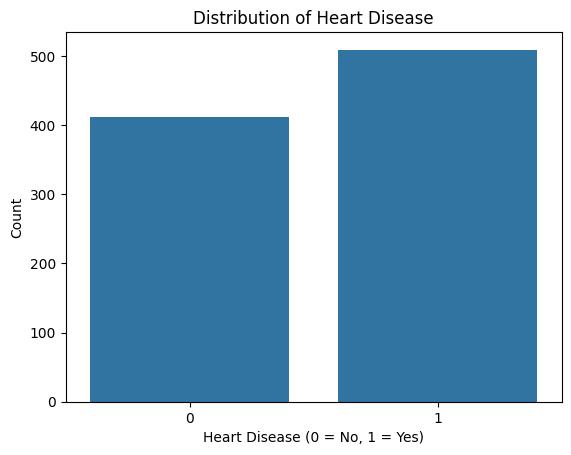

In [28]:

df['num'].value_counts(normalize=True)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='num', data=df)
plt.title("Distribution of Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


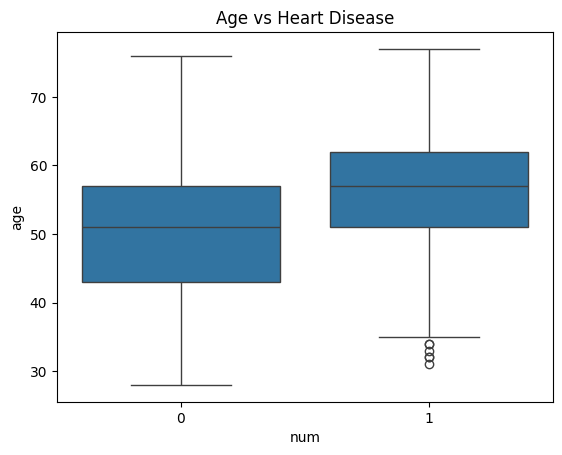

num
0    51.0
1    57.0
Name: age, dtype: float64

In [29]:
sns.boxplot(x='num', y='age', data=df)
plt.title("Age vs Heart Disease")
plt.show()
df.groupby('num')['age'].median()


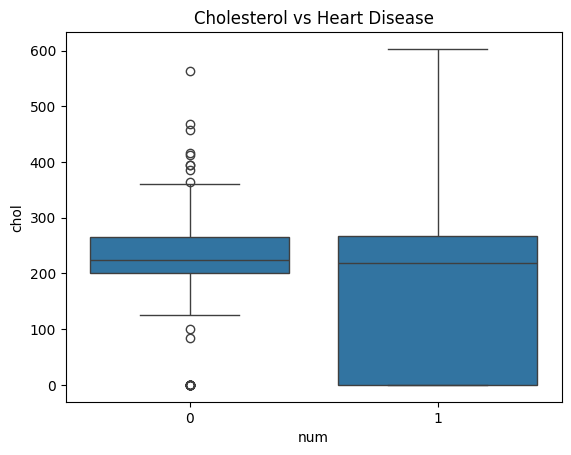

num
0    225.0
1    219.0
Name: chol, dtype: float64

In [30]:
sns.boxplot(x='num', y='chol', data=df)
plt.title("Cholesterol vs Heart Disease")
plt.show()
df.groupby('num')['chol'].median()


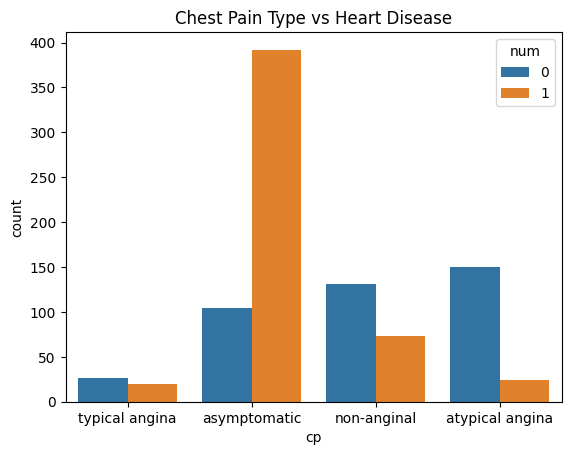

num,0,1
cp,,
asymptomatic,0.209677,0.790323
atypical angina,0.862069,0.137931
non-anginal,0.642157,0.357843
typical angina,0.565217,0.434783


In [31]:
sns.countplot(x='cp', hue='num', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()
pd.crosstab(df['cp'], df['num'], normalize='index')


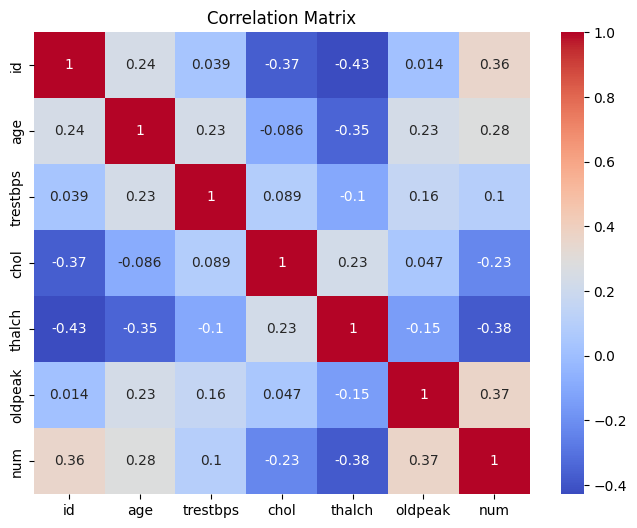

In [32]:
# Convert target to numeric if needed (it already is 0/1)
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [33]:
X = df.drop(columns=['num'])
y = df['num']

X.shape, y.shape


((920, 13), (920,))

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((736, 13), (184, 13))

In [35]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

X_train_encoded.shape
X_test_encoded.shape


(184, 19)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)
model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)



NameError: name 'LogisticRegression' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.78      0.82        82
           1       0.83      0.89      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train_encoded, y_train)

y_pred_rf = rf_model.predict(X_test_encoded)
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.8858695652173914
              precision    recall  f1-score   support

           0       0.92      0.82      0.86        82
           1       0.86      0.94      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.88       184



In [ ]:
import pandas as pd
import numpy as np

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X_train_encoded.columns
).sort_values(ascending=False)

feature_importance.head(10)


id                    0.284319
oldpeak               0.098045
age                   0.088544
thalch                0.088204
chol                  0.082434
exang_True            0.077958
trestbps              0.053846
cp_atypical angina    0.040200
dataset_Hungary       0.032568
sex_Male              0.028748
dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

cv_scores = cross_val_score(rf_model, X_train_encoded, y_train, cv=5)

cv_scores
cv_scores.mean()
cv_scores


array([0.88513514, 0.8707483 , 0.87755102, 0.80272109, 0.85034014])

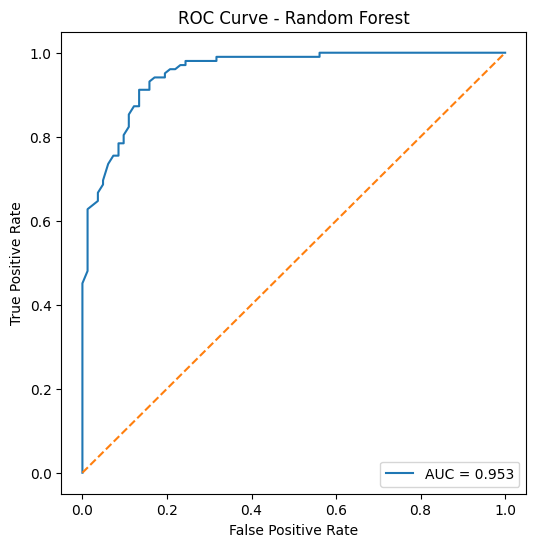

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_encoded, y_train)
from sklearn.metrics import roc_curve, auc

y_prob = rf_model.predict_proba(X_test_encoded)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

roc_auc

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


Shape: (920, 16)
Missing values after cleaning:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64
Train shape: (736, 18)
Test shape: (184, 18)

Accuracy: 0.8586956521739131

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        82
           1       0.86      0.89      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184


Confusion Matrix:
[[67 15]
 [11 91]]

Cross-validation scores: [0.81756757 0.85034014 0.82312925 0.76190476 0.80272109]
Mean CV accuracy: 0.8111325611325612

AUC Score: 0.909313725490196


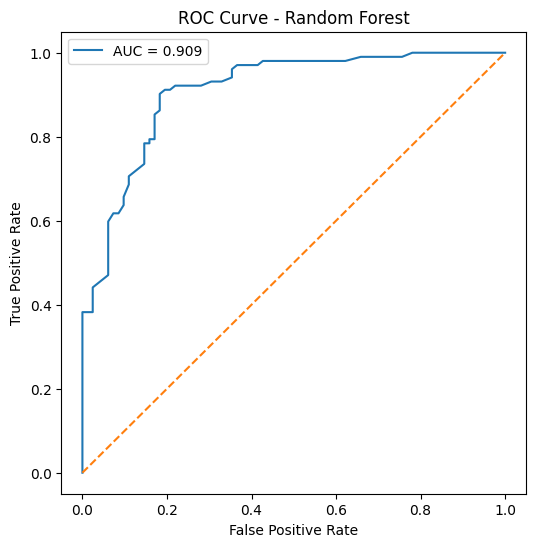


Top Feature Importance:
chol                   0.139387
thalch                 0.133417
age                    0.128955
oldpeak                0.119523
exang_True             0.092181
trestbps               0.081835
cp_atypical angina     0.064391
sex_Male               0.044560
cp_non-anginal         0.031601
dataset_Switzerland    0.030140
dtype: float64


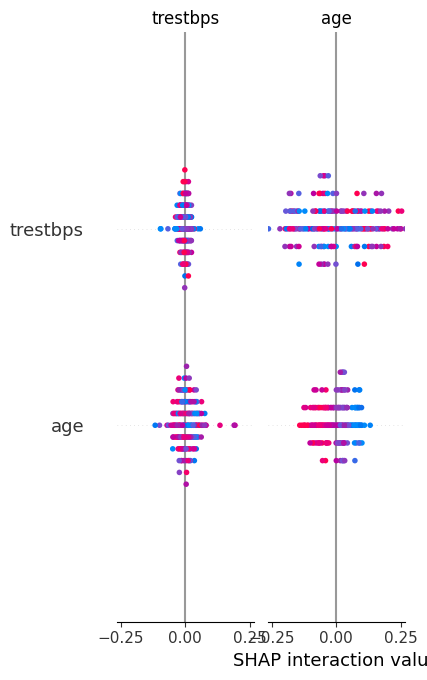

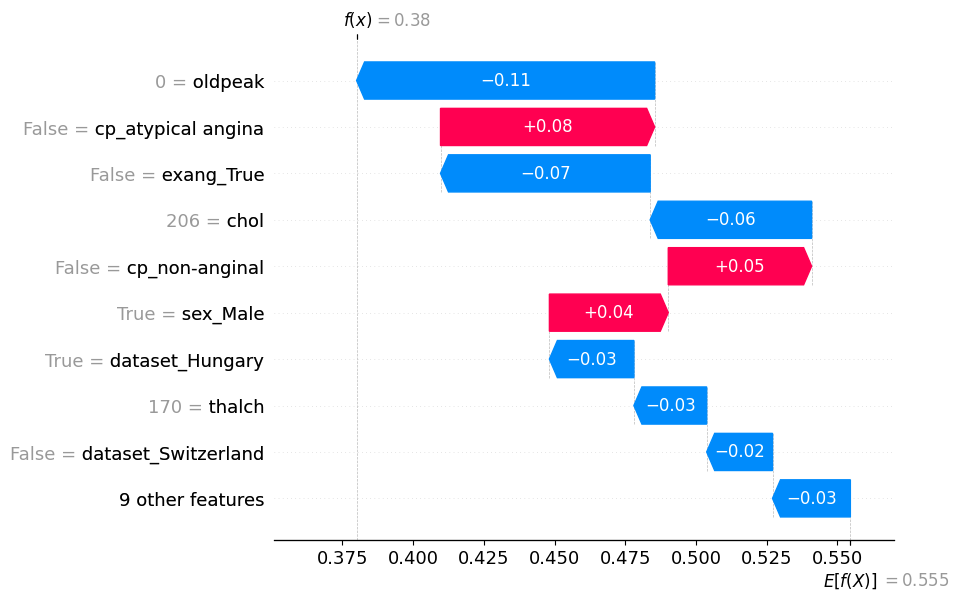

In [ ]:
# ============================================
# 1. IMPORT LIBRARIES
# ============================================

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

import shap


# ============================================
# 2. LOAD DATA
# ============================================

df = pd.read_csv("../data/heart.csv")

print("Shape:", df.shape)
df.head()


# ============================================
# 3. TARGET CONVERSION
# Convert num → binary
# ============================================

df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)


# ============================================
# 4. DROP HIGH MISSING COLUMNS
# ============================================

df = df.drop(columns=['ca', 'thal'])


# ============================================
# 5. HANDLE MISSING VALUES
# ============================================

# numerical → median
numerical_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']

for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())


# categorical → mode
categorical_cols = ['fbs', 'exang', 'restecg', 'slope']

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


print("Missing values after cleaning:")
print(df.isnull().sum())


# ============================================
# 6. SPLIT FEATURES AND TARGET
# ============================================

X = df.drop(columns=['num', 'id'])
y = df['num']



# ============================================
# 7. TRAIN TEST SPLIT
# ============================================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# ============================================
# 8. ENCODE CATEGORICAL VARIABLES
# ============================================

X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

print("Train shape:", X_train_encoded.shape)
print("Test shape:", X_test_encoded.shape)


# ============================================
# 9. TRAIN RANDOM FOREST MODEL
# ============================================

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train_encoded, y_train)


# ============================================
# 10. MODEL EVALUATION
# ============================================

y_pred = rf_model.predict(X_test_encoded)

print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# ============================================
# 11. CROSS VALIDATION
# ============================================

cv_scores = cross_val_score(
    rf_model,
    X_train_encoded,
    y_train,
    cv=5
)

print("\nCross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


# ============================================
# 12. ROC CURVE AND AUC
# ============================================

y_prob = rf_model.predict_proba(X_test_encoded)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

print("\nAUC Score:", roc_auc)


# Plot ROC curve
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")

plt.plot([0,1], [0,1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC Curve - Random Forest")

plt.legend()

plt.show()


# ============================================
# 13. FEATURE IMPORTANCE
# ============================================

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X_train_encoded.columns
).sort_values(ascending=False)

print("\nTop Feature Importance:")
print(feature_importance.head(10))


# ============================================
# 14. SHAP EXPLAINABILITY
# ============================================

explainer = shap.TreeExplainer(rf_model)

shap_values = explainer(X_test_encoded)


# Global explanation
shap.summary_plot(shap_values, X_test_encoded)


# ============================================
# 15. EXPLAIN ONE PATIENT
# ============================================

patient_index = 0

shap.plots.waterfall(shap_values[patient_index, :, 1])






Prediction: Heart Disease
Risk Probability: 0.95


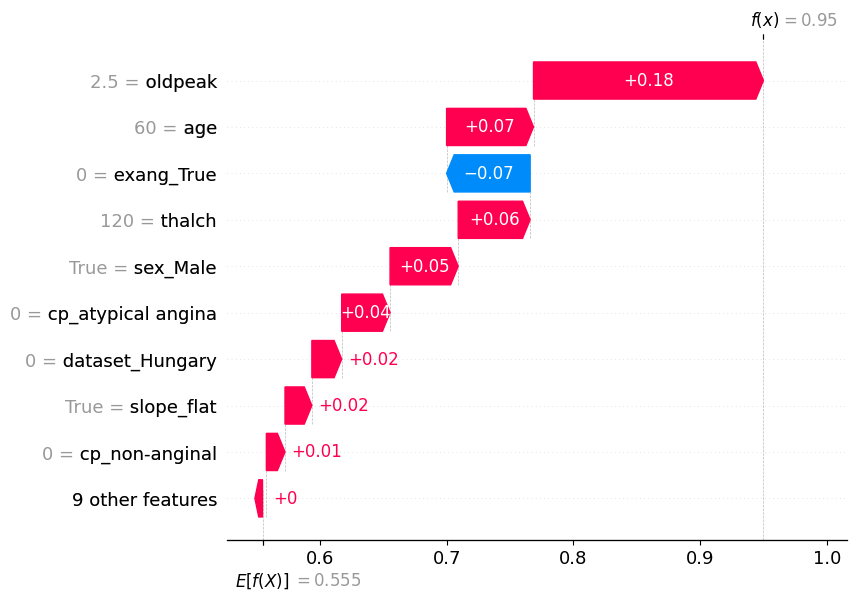

In [ ]:
# Example new patient data
new_patient = {
    'age': 60,
    'sex': 'Male',
    'dataset': 'Cleveland',
    'cp': 'asymptomatic',
    'trestbps': 140,
    'chol': 250,
    'fbs': False,
    'restecg': 'normal',
    'thalch': 120,
    'exang': True,
    'oldpeak': 2.5,
    'slope': 'flat'
}

# Convert to DataFrame
new_patient_df = pd.DataFrame([new_patient])

# Encode same as training data
new_patient_encoded = pd.get_dummies(new_patient_df)

# Match columns with training data
new_patient_encoded = new_patient_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Predict
prediction = rf_model.predict(new_patient_encoded)

# Predict probability
probability = rf_model.predict_proba(new_patient_encoded)[0][1]

# Show result
if prediction[0] == 1:
    print("Prediction: Heart Disease")
else:
    print("Prediction: No Heart Disease")

print("Risk Probability:", round(probability, 3))
# Generate SHAP values for this new patient
new_patient_shap = explainer(new_patient_encoded)
# Show explanation for disease class (class 1)
shap.plots.waterfall(new_patient_shap[0, :, 1])


In [ ]:
from xgboost import XGBClassifier

print("XGBoost is working")


XGBoost is working


XGBoost Accuracy: 0.886
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

XGBoost AUC: 0.947


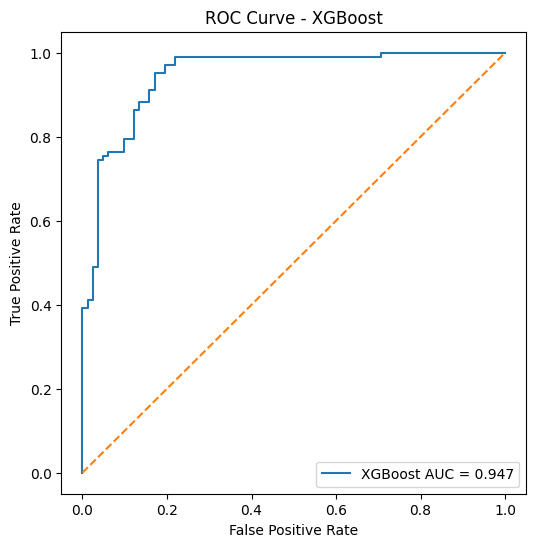

id                    0.157994
exang_True            0.142375
cp_atypical angina    0.067439
oldpeak               0.063431
sex_Male              0.062611
cp_non-anginal        0.057546
slope_upsloping       0.052462
cp_typical angina     0.051738
thalch                0.045871
age                   0.041694
dtype: float32

In [37]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_encoded, y_train)
y_pred_xgb = xgb_model.predict(X_test_encoded)
y_prob_xgb = xgb_model.predict_proba(X_test_encoded)[:, 1]
from sklearn.metrics import accuracy_score

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("XGBoost Accuracy:", round(accuracy_xgb, 3))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_xgb))
from sklearn.metrics import roc_curve, auc

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

print("XGBoost AUC:", round(roc_auc_xgb, 3))
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost AUC = {roc_auc_xgb:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()
import pandas as pd

importance_xgb = pd.Series(
    xgb_model.feature_importances_,
    index=X_train_encoded.columns
)

importance_xgb.sort_values(ascending=False).head(10)


